# 🌤️ Weather Data Analysis & Basic Prediction

This project is a data science project focused on weather data. It includes full data cleaning, exploratory data analysis (EDA), visualizations, and a simple machine learning model for predicting weather outcomes.
## 📁 Dataset

- **Source**: [Kaggle - Weather.csv](https://www.kaggle.com/datasets/zaraavagyan/weathercsv)
- **Description**: This dataset contains daily weather observations from multiple Australian weather stations.  

## 🛠️ Tools & Libraries

- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn
- Jupyter Notebook / Google Colab

#  📥 Importing Data
In this step, we load the dataset from an Excel file into a Pandas DataFrame for analysis.

In [1]:
import pandas as pd
df= pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 📊 Data Overview
We begin by exploring the basic structure of the dataset:

Dimensions and column names
Data types
Summary statistics
Missing values

In [2]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:" , df.dtypes)
print("\nSummary statistics:", df.describe())
print("\nMissing values:", df.isnull().sum())

Shape of dataset: (145460, 23)

Column names:
 ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

Data types: Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Summary statistics:              MinTemp 

# 🧹 Data Cleaning
In this step, our goal is to prepare the dataset for analysis and modeling by performing the following tasks:

In [3]:
# 1. Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Check percentage of missing data in each column
missing_percent = df.isnull().mean() * 100
# print(missing_percent)
# 3. Convert 'Yes'/'No' to 1/0 in binary columns
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 4. Drop rows where target 'RainTomorrow' is missing
df = df.dropna(subset=['RainTomorrow'])

# 5. Show remaining missing data counts
print(df.isnull().sum())
df.head()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


# 🧹 Handling Missing Data

In [4]:
# Check missing value percentages again
missing_percent = df.isnull().mean() * 100
print(missing_percent)

# Fill missing values in numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Fill missing values in categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col]= df[col].fillna(mode_val)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df.drop('Date', axis=1, inplace=True)

# Display remaining missing values after imputation
print("Missing values after imputation:")
print(df.isnull().sum())

df.head()


Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64
Missing values after imputation:
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


In [5]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Columns with only two unique values (binary)
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

# Apply label encoding (Yes/No → 1/0)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Remaining categorical columns (non-binary)
multi_cat_cols = [col for col in categorical_cols if col not in binary_cols]

# # # Apply one-hot encoding
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

df.head()


Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


# 📊(Data Visualization)

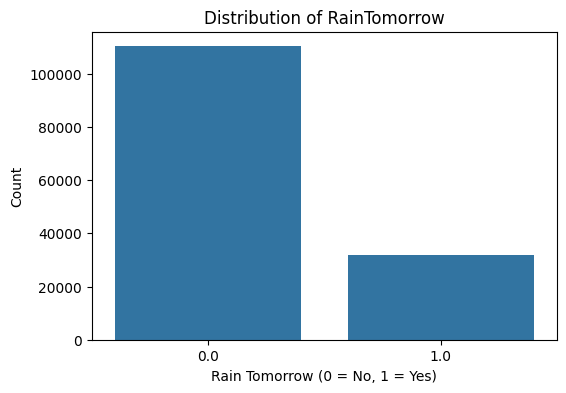

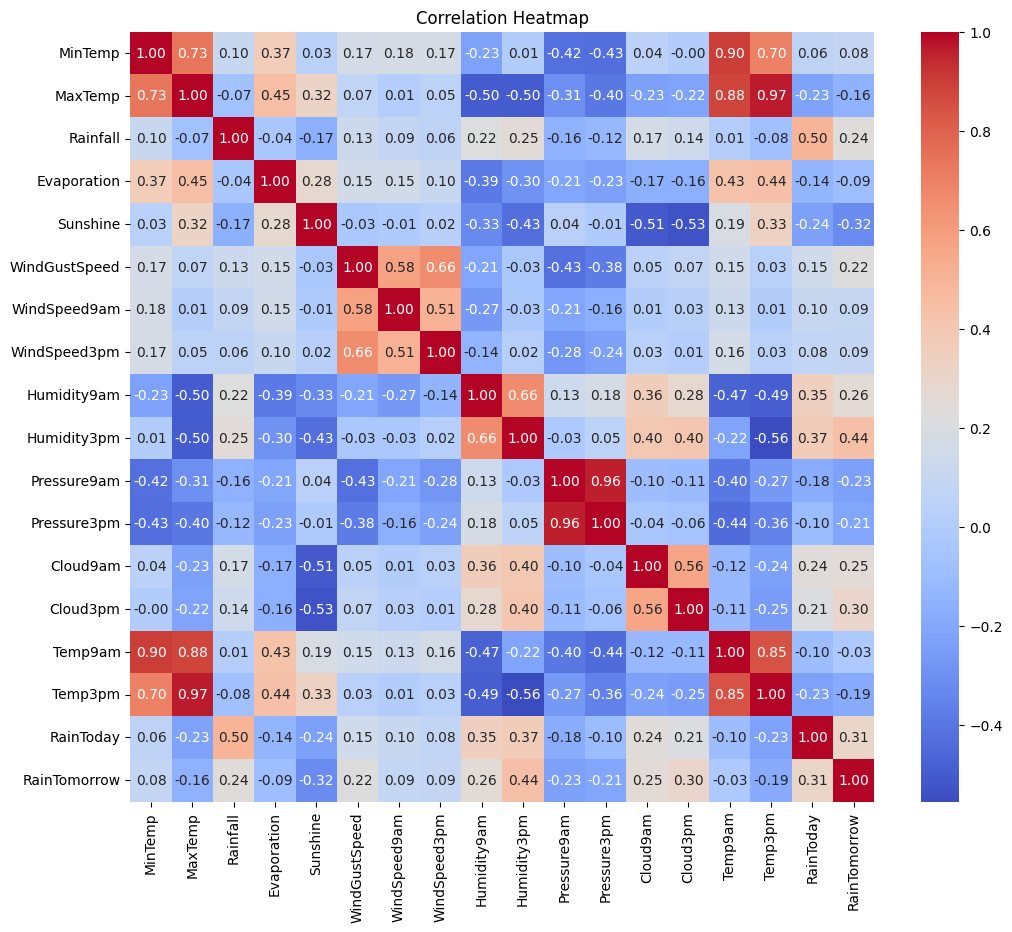

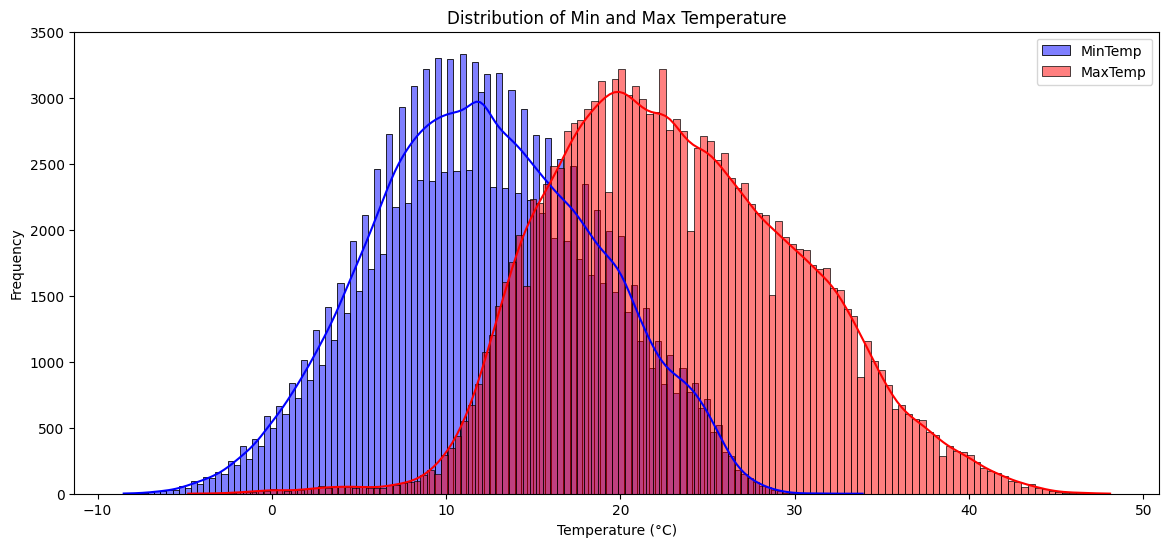

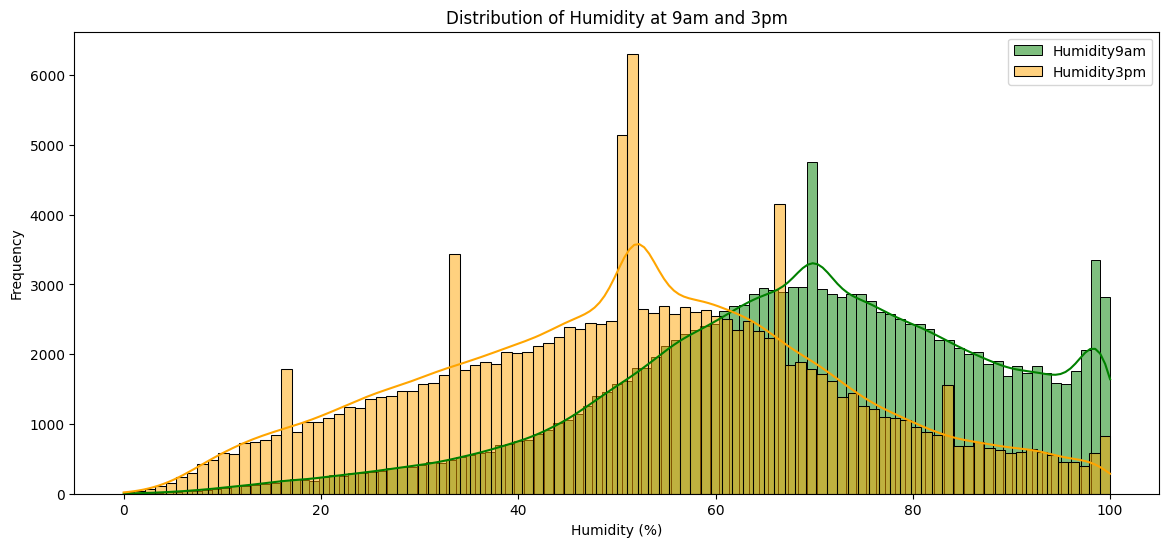

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of the target variable (RainTomorrow)
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Correlation heatmap of numerical features
plt.figure(figsize=(12,10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Distribution of Min and Max Temperature
plt.figure(figsize=(14,6))
sns.histplot(df['MinTemp'], kde=True, color='blue', label='MinTemp')
sns.histplot(df['MaxTemp'], kde=True, color='red', label='MaxTemp')
plt.legend()
plt.title('Distribution of Min and Max Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Humidity at 9am and 3pm
plt.figure(figsize=(14,6))
sns.histplot(df['Humidity9am'], kde=True, color='green', label='Humidity9am')
sns.histplot(df['Humidity3pm'], kde=True, color='orange', label='Humidity3pm')
plt.legend()
plt.title('Distribution of Humidity at 9am and 3pm')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

## Machine Learning & Modeling Overview

After completing data cleaning and preprocessing steps, we are entering the machine learning phase of the project.

In [7]:
# Define target variable
y = df['RainTomorrow']

# Define feature set (drop the target column)
X = df.drop('RainTomorrow', axis=1)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 1. Balance training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# 3. Define Random Forest model
rf = RandomForestClassifier(random_state=42)
# 4. Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],    # number of trees
    'max_depth': [10, 20],         # tree depth
    'min_samples_split': [2],      # minimum samples to split a node
    'min_samples_leaf': [1]        # minimum samples at leaf node
}

# 5. Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='f1', verbose=2)

# 6. Fit GridSearch on training data
grid_search.fit(X_train_scaled, y_train_balanced)

# 7. Best estimator from grid search
best_rf = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# 8. Predict and evaluate on test set
y_pred = best_rf.predict(X_test_scaled)

print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Optimized Random Forest Accuracy: 0.8453180491578466

Confusion Matrix:
 [[19908  2156]
 [ 2243  4132]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     22064
         1.0       0.66      0.65      0.65      6375

    accuracy                           0.85     28439
   macro avg       0.78      0.78      0.78     28439
weighted avg       0.84      0.85      0.84     28439

